In [1]:
import networkExpansionPy.lib as ne
from scipy.sparse import csr_matrix
import numpy as np
from random import sample
import pandas as pd

#from copy import copy, deepcopy
import random
import seaborn as sns
from matplotlib_venn import venn2

In [53]:
metabolism = ne.GlobalMetabolicNetwork()
#metabolism.pruneUnbalancedReactions()
#metabolism.pruneInconsistentReactions()
#metabolism.set_ph(7.0)
metabolism.convertToIrreversible()

oxygen_dependent_rxns = metabolism.network[metabolism.network.cid.isin(['C00007'])].rn.unique().tolist()
o2_independent_rxns = [x for x in metabolism.network.rn.unique().tolist() if x not in oxygen_dependent_rxns]

# only keep anaerobic reactions
metabolism.subnetwork(o2_independent_rxns)
#metabolism.setMetaboliteBounds(ub=1e-1,lb=1e-6)
#metabolism.pruneThermodynamicallyInfeasibleReactions(keepnan=False)

In [92]:
metabolism = ne.GlobalMetabolicNetwork()
metabolism.convertToIrreversible()

oxygen_dependent_rxns = metabolism.network[metabolism.network.cid.isin(['C00007'])].rn.unique().tolist()
o2_independent_rxns = [x for x in metabolism.network.rn.unique().tolist() if x not in oxygen_dependent_rxns]

# only keep anaerobic reactions
metabolism.subnetwork(o2_independent_rxns)
#metabolism.setMetaboliteBounds(ub=1e-1,lb=1e

In [93]:
rz = metabolism.network.rn.unique()

In [94]:
len(rz)

7926

In [95]:
len([x for x in rz if x in y['rxn'].tolist()]) 

6134

In [96]:
7926 - 6134

1792

In [3]:
#mm = ne.GlobalMetabolicNetwork()
#metabolism.pruneUnbalancedReactions()
#metabolism.pruneInconsistentReactions()
#metabolism.set_ph(7.0)

#mm.convertToIrreversible()

In [4]:
# define seed compounds
cpds = pd.read_csv('/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/assets/compounds/seeds.csv')
cpds['CID'] = cpds['CID'].apply(lambda x: x.strip())

In [5]:
len(cpds["Name"].tolist())

44

In [17]:
rules = pd.read_csv('/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/assets/ecode/cath_code_rule.keggRxn.Jan2020.csv')

In [36]:
rns = rules.rn.unique()

In [54]:
grxns = set(metabolism.network.rn.unique().tolist())
frxns = set(rns)
subsets = (len(grxns - frxns), len(frxns - grxns), len(grxns.intersection(frxns)))

NameError: name 'plt' is not defined

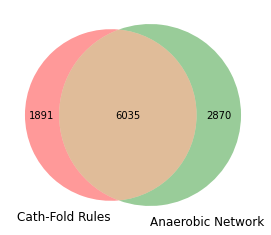

In [38]:
venn2(subsets = subsets,set_labels={'Anaerobic Network','Cath-Fold Rules'})
plt.title('KEGG reactions')

In [7]:
#rns = rules.rn.unique().tolist()
seed_set = cpds['CID'].unique().tolist()

In [8]:
m = metabolism.copy()
#m.subnetwork(rns)
#m.seedSet = seed_set
ne_cpds,ne_rxns = m.expand(seed_set)

/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:239: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


In [23]:
m.subnetwork(rxn_sets)
ne_cpds_sm,ne_rxns_sm = m.expand(seed_set)

/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:239: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


In [56]:
m2 = metabolism.copy()

In [55]:
r2 = list(grxns - frxns)

In [57]:
m2.subnetwork(r2)
ne_cpds_sm2,ne_rxns_sm2 = m2.expand(seed_set)

/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:239: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


In [64]:
y = pd.read_csv('../networkExpansionPy/assets/KEGG/ec_rxn_mapping.txt',sep='\t')

In [67]:
y['ec3'] = y['ec'].apply(lambda x: ".".join(x.split('.')[0:3]))

In [72]:
len(y[y.rxn.isin(r2)].ec3.unique())

79

In [80]:
y[~y['ec3'].isin(rules['ec_3l'].unique().tolist())]

,ec,rxn,ec3
76,1.9.3.1,R00081,1.9.3
78,1.9.3.1,R00082,1.9.3
86,3.6.3.1,R00086,3.6.3
87,3.6.3.2,R00086,3.6.3
88,3.6.3.3,R00086,3.6.3
...,...,...,...
9923,1.14.21.9,R10323,1.14.21
9978,1.14.21.10,R10416,1.14.21
10080,3.6.3.55,R10531,3.6.3
10152,1.5.7.2,R10603,1.5.7


In [78]:
rules['ec_3l'].unique().tolist()

['1.1.1',
 '1.1.2',
 '1.1.3',
 '1.1.5',
 '1.1.7',
 '1.1.9',
 '1.1.98',
 '1.1.99',
 '1.10.3',
 '1.10.5',
 '1.11.1',
 '1.11.2',
 '1.12.1',
 '1.12.2',
 '1.12.5',
 '1.12.7',
 '1.12.98',
 '1.12.99',
 '1.13.11',
 '1.13.12',
 '1.14.11',
 '1.14.12',
 '1.14.13',
 '1.14.14',
 '1.14.15',
 '1.14.16',
 '1.14.17',
 '1.14.18',
 '1.14.19',
 '1.14.20',
 '1.14.99',
 '1.15.1',
 '1.16.1',
 '1.16.3',
 '1.17.1',
 '1.17.3',
 '1.17.4',
 '1.17.5',
 '1.17.7',
 '1.17.9',
 '1.17.99',
 '1.18.1',
 '1.18.6',
 '1.19.1',
 '1.2.1',
 '1.2.3',
 '1.2.4',
 '1.2.5',
 '1.2.7',
 '1.2.98',
 '1.2.99',
 '1.20.1',
 '1.20.4',
 '1.20.9',
 '1.21.1',
 '1.21.3',
 '1.21.99',
 '1.23.1',
 '1.23.5',
 '1.3.1',
 '1.3.3',
 '1.3.5',
 '1.3.7',
 '1.3.8',
 '1.3.98',
 '1.3.99',
 '1.4.1',
 '1.4.3',
 '1.4.4',
 '1.4.7',
 '1.4.9',
 '1.4.99',
 '1.5.1',
 '1.5.3',
 '1.5.5',
 '1.5.8',
 '1.5.98',
 '1.5.99',
 '1.6.1',
 '1.6.2',
 '1.6.3',
 '1.6.5',
 '1.6.99',
 '1.7.1',
 '1.7.2',
 '1.7.3',
 '1.7.5',
 '1.7.6',
 '1.7.7',
 '1.7.99',
 '1.8.1',
 '1.8.2',
 '1.8.3'

In [75]:
codes =  rules['cath_code_rule'].apply(lambda x: set(x.split('_')))
rules['cath_sets']= rules['cath_code_rule'].apply(lambda x: set(x.split('_')))

cath_codes = [item for sublist in codes for item in sublist]
cath_codes = list(set(cath_codes))

def rule2rn(foldSet,x):
    if x.issubset(foldSet):
        return True
    else:
        return False
    
def folds2rn(rules_sub,foldSet):
    rules_sub['rn_feasible'] = rules_sub['cath_sets'].apply(lambda x: rule2rn(foldSet,x))
    rns = rules_sub[rules_sub['rn_feasible']].rn.tolist()
    return rns


In [76]:

def iterative_fold_expansion(metabolism,codes,fold_set,cpd_set):
    code_dict = {}
    fold_dict = {}
    rn_dict = {}
    for code in codes:
        fold_set_j = fold_set.union(set([code]))
        fold_dict[code] = fold_set_j
        rxns = folds2rn(rules,fold_set_j)
        m = metabolism.copy()
        # only keep reactions
        m.subnetwork(rxns)
        rn_dict[code] = rxns
        if len(m.network) > 0:
            cpds,rxns= m.expand(list(cpd_set))
            cpd_set_new = cpd_set.union(set(cpds))
            code_dict[code] = cpd_set_new
            
        else:
            code_dict[code] = cpd_set
            
    return code_dict,fold_dict,rn_dict

In [77]:
# run determinstic fold expansion (i.e. exhaust all cath codes by choosing max. network size post expansion)
fold_set = set()
cpd_set = set(seed_set)
code_remain = cath_codes[:]
code_order = []
compound_order = []

while len(code_remain) > 0:
    code_dict,fold_dict,rn_dict = iterative_fold_expansion(metabolism,code_remain,fold_set,cpd_set)
    cpd_nums = np.array([len(y) for x,y in code_dict.items()])
    max_idx = cpd_nums.argmax()
    new_code = code_remain[max_idx]
    code_order.append(new_code)
    fold_set = fold_set.union(set([new_code]))
    code_remain = [x for x in code_remain if x not in list(fold_set)]
    compound_order.append(code_dict[new_code])
    # add to growing compound and fold set
    cpd_set = cpd_set.union(set(code_dict[new_code]))


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is 

In [78]:
results = {}
results['fold_ordering'] = code_order
results['compound_ordering'] = compound_order
results['seed_set'] = seed_set

In [79]:
c = seed_set[:]
rt = {'iteration': [], "fold": [], 'numCompounds': []}

for i in range(0,len(results['fold_ordering'])):
    rt['iteration'].append(i+1);
    rt['fold'].append(results['fold_ordering'][i])
    rt['numCompounds'].append(len(results['compound_ordering'][i]))

In [80]:
pd.DataFrame(rt).set_index('iteration').to_csv('foldOrdering.Thermo.csv')

<AxesSubplot:xlabel='iteration', ylabel='numCompounds'>

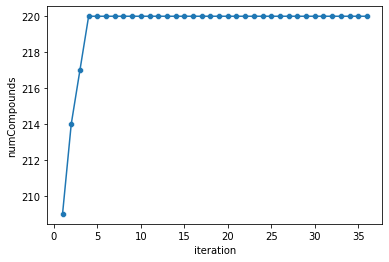

In [82]:
sns.lineplot(x='iteration',y='numCompounds', data= pd.DataFrame(rt))
sns.scatterplot(x='iteration',y='numCompounds', data= pd.DataFrame(rt))

In [43]:
#['C00039' in x for x in results['compound_ordering']]

In [109]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
iteration = 0
if iteration > 0:
    c = [x for x in results['compound_ordering'][iteration] if x not in results['compound_ordering'][iteration-1]]
else:
    c =  results['compound_ordering'][iteration]
    
metabolism.compounds[metabolism.compounds.cid.isin(c)]

,cid,formula,name,num_rgroup,electrons
0,C00001,H2O,H2O; Water,0,10.0
8,C00009,H3PO4,Orthophosphate; Phosphate; Phosphoric acid; Or...,0,50.0
10,C00011,CO2,CO2; Carbon dioxide,0,22.0
13,C00014,NH3,Ammonia; NH3,0,10.0
21,C00022,C3H4O3,Pyruvate; Pyruvic acid; 2-Oxopropanoate; 2-Oxo...,0,46.0
...,...,...,...,...,...
4586,C06217,C36H62O31,Cellohexaose,0,526.0
4587,C06218,C30H52O26,Cellopentaose,0,440.0
4588,C06219,C18H32O16,Cellotriose,0,268.0
4610,C06255,C5H8O3,2-Oxopentanoic acid; 2-Oxovalerate; 2-Oxopenta...,0,62.0


In [50]:
import pickle

with open('cath_fold_order.Thermo.19Jan2020.v0.pkl', 'wb') as output:
    pickle.dump(results, output, pickle.HIGHEST_PROTOCOL)

In [88]:
import pickle
with open('cath_fold_order.19Jan2020.v0.pkl', 'rb') as f:
    results = pickle.load(f)

In [100]:
#
y = [len(results['seed_set'])] + [len(x) for x in results['compound_ordering']]
x = range(0,len(results['compound_ordering'])+1)

In [108]:
np.diff(np.array(y))

array([878,  25,  13,   4,   3,   2,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

Text(0, 0.5, 'number of compounds')

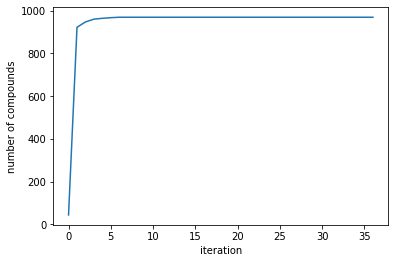

In [101]:
sns.lineplot(y=y,x = x)
#sns.scatterplot(y=[len(x) for x in compound_order],x = range(0,len(compound_order)))
plt.xlabel('iteration')
plt.ylabel('number of compounds')

In [109]:
#sns.lineplot(y=[len(x) for x in compound_order],x = range(0,len(compound_order)))
#sns.scatterplot(y=[len(x) for x in compound_order],x = range(0,len(compound_order)))

#plt.xlabel('iteration')
#plt.ylabel('number of compounds')

In [52]:
import random

In [56]:
cath_codes_perm = cath_codes.copy()
random.shuffle(cath_codes_perm)

In [61]:
fold_set = set()
cpd_set = set(seed_set)
cpd_num = []

for cath in cath_codes_perm:
    fold_set = fold_set.union(set([cath]))
    
    rxns = folds2rn(rules,fold_set)
    # prune network 
    m = metabolism.copy()
    # only keep reactions
    m.subnetwork(rxns)
    if len(m.network) > 0:
        cpds,rxns= m.expand(list(cpd_set))
        cpd_set = cpd_set.union(set(cpds))

    cpd_num.append(len(cpd_set))
    print('done with cath: ' + cath)

/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.170


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.15


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 1.50


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.160


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.150


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.110


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.10


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.50


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.40


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.60


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.20


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.60


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.102


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.80


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.30


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.130


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.80


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.140


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.115


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.55


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.120


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.75


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.20


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 4.10


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.40


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.90


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 6.10


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 1.10


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.30


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 2.70


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 6.20


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.10


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.70


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 3.65


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


done with cath: 1.25
done with cath: 1.20


/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)


<AxesSubplot:>

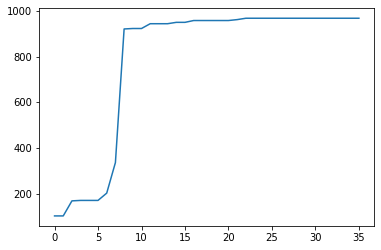

In [112]:
sns.lineplot(x=range(0,len(cpd_num)),y=cpd_num)

In [117]:
rand_results1 = {'fold_order':[],'cpd_num':[]}
rand_results1['fold_order'].append(cath_codes_perm)
rand_results1['cpd_num'].append(cpd_num)

In [118]:
def compute_random_compound_fe(folds):
    fold_set = set()
    cpd_sets = []
    cpd_set = set(seed_set)
    cpd_num = []

    for cath in folds:
        fold_set = fold_set.union(set([cath]))

        rxns = folds2rn(rules,fold_set)
        # prune network 
        m = metabolism.copy()
        # only keep reactions
        m.subnetwork(rxns)
        if len(m.network) > 0:
            cpds,rxns= m.expand(list(cpd_set))
            cpd_set = cpd_set.union(set(cpds))

        cpd_num.append(len(cpd_set))
        cpd_sets.append(cpd_set)
        #print('done with cath: ' + cath)
    return cpd_sets,cpd_num
    


In [119]:
numSims = 20
rand_results = {'fold_order':[],'cpd_num':[],'cpd_sets':[]}

for i in range(numSims):
    random.shuffle(cath_codes_perm)
    cpd_sets,cpd_num = compute_random_compound_fe(cath_codes_perm)
    rand_results['fold_order'].append(cath_codes_perm)
    rand_results['cpd_num'].append(cpd_num)
    rand_results['cpd_sets'].append(cpd_sets)

/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  x,y = netExp(R,P,x0,b)
/Users/joshuagoldford/Documents/github/networkExpansionPy/networkExpansionPy/lib.py:181: SparseEfficiencyWarning: Comparing sparse matrices using == is 

In [122]:
results['compound_ordering']

[{'C00001',
  'C00002',
  'C00008',
  'C00009',
  'C00011',
  'C00012',
  'C00013',
  'C00014',
  'C00015',
  'C00018',
  'C00019',
  'C00020',
  'C00021',
  'C00022',
  'C00025',
  'C00026',
  'C00027',
  'C00029',
  'C00031',
  'C00033',
  'C00035',
  'C00036',
  'C00037',
  'C00039',
  'C00041',
  'C00042',
  'C00043',
  'C00044',
  'C00046',
  'C00047',
  'C00048',
  'C00049',
  'C00051',
  'C00052',
  'C00053',
  'C00054',
  'C00055',
  'C00058',
  'C00059',
  'C00062',
  'C00063',
  'C00064',
  'C00065',
  'C00066',
  'C00067',
  'C00073',
  'C00074',
  'C00075',
  'C00077',
  'C00080',
  'C00081',
  'C00084',
  'C00085',
  'C00086',
  'C00089',
  'C00090',
  'C00092',
  'C00094',
  'C00095',
  'C00096',
  'C00097',
  'C00099',
  'C00103',
  'C00104',
  'C00105',
  'C00106',
  'C00109',
  'C00111',
  'C00112',
  'C00114',
  'C00117',
  'C00118',
  'C00119',
  'C00121',
  'C00122',
  'C00123',
  'C00124',
  'C00127',
  'C00128',
  'C00130',
  'C00131',
  'C00132',
  'C00133',
  'C